In [284]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  # make charts prettier and more readable

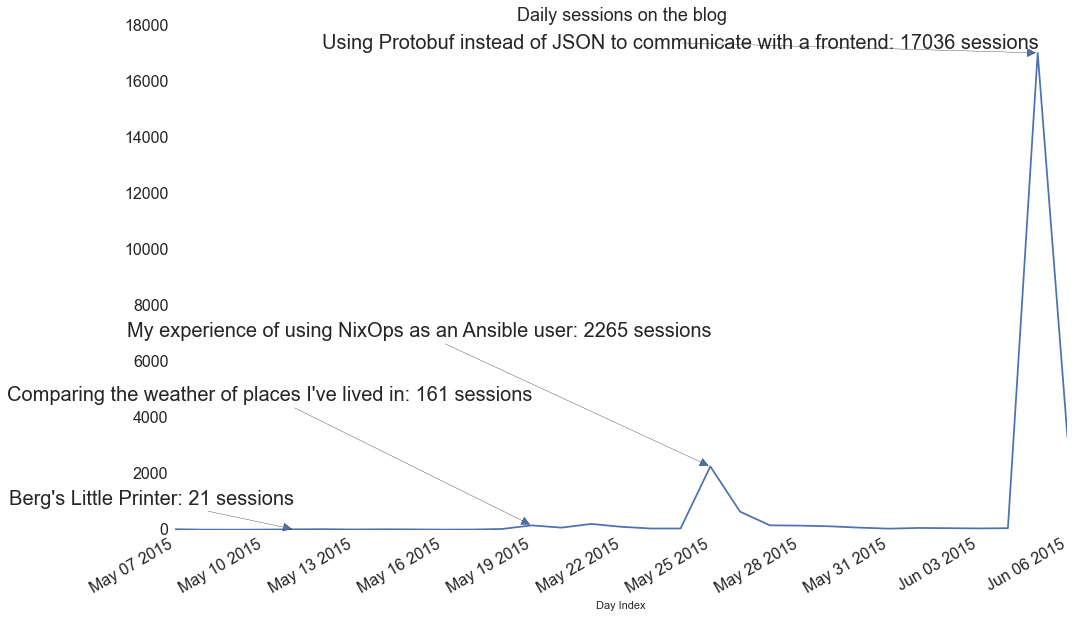

In [285]:
# Let's look at the number of sessions first
sessions = pd.read_csv(
    'sessions.csv',
    index_col='Day Index',
    parse_dates=True
)

def intify_sessions(df):
    """GA returns some numbers as string, that won't do here we need ints"""
    return df['Sessions'].replace(',', '', regex=True).astype('int')

# We need to ensure we only have ints
sessions['Sessions'] = intify_sessions(sessions)

# We will annotate the data with our articles to see the 
# difference between them
# The number at the end of the tuples is the y offset 
# for the annotation
articles = [
    ("2015-05-11", "Berg's Little Printer", 30),
    ("2015-05-19", "Comparing the weather of places I've lived in", 130),
    ("2015-05-25", "My experience of using NixOps as an Ansible user", 135),
    ("2015-06-05", "Using Protobuf instead of JSON to communicate with a frontend", 10),
]
dates = [date.isoformat() for date in sessions.index.date.tolist()]

plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
plt.tick_params(axis='both', which='major', labelsize=16)
sessions['Sessions'].plot(x_compat=True)

plt.title("Daily sessions on the blog", fontsize=18)

for article in articles:
    index = dates.index(article[0])
    number_sessions = sessions['Sessions'][index]
    _ = ax.annotate(
        '%s: %d sessions' % (article[1], number_sessions),
        xy=(sessions.index[index], sessions['Sessions'][index]),
        fontsize= 20,
        horizontalalignment='right', verticalalignment='center',
        xytext=(00, article[2]),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>'))

Here are the links of the articles for reference (I'll refer to them by their number in the list below from now on):

1. [Berg's Little Printer](https://blog.wearewizards.io/bergs-little-printer)
2. [Comparing the weather of places I've lived in](https://blog.wearewizards.io/comparing-the-weather-of-places-ive-lived-in)
3. [My experience of using NixOps as an Ansible user](https://blog.wearewizards.io/my-experience-of-using-nixops-as-an-ansible-user)
4. [Using Protobuf instead of JSON to communicate with a frontend](https://blog.wearewizards.io/using-protobuf-instead-of-json-to-communicate-with-a-frontend)

We always tweet when we post an article but only post the ones we feel are interesting enough. Article 1 has not been posted anywhere, number 2 has been posted on [r/python](https://www.reddit.com/r/python) and number 3 and 4 were both on the front page of HackerNews, with number 4 being at the top for some time.  
From that graph and my experience with my [previous blog](http://vincent.is/), HN brings way more readers than reddit or twitter.

Let's have a look to see if I'm right.

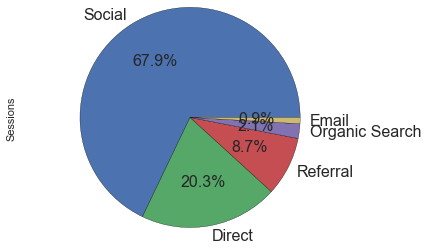

In [290]:
channels = pd.read_csv('channels.csv')
# We need to ensure we only have ints
channels['Sessions'] = intify_sessions(channels)
plt.figure()
wedges = channels['Sessions'].plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=channels['Default Channel Grouping'],
    fontsize=16,
    labeldistance=1.1
)

_ = plt.axis('equal')

We can see most of our sessions are coming from Social, which includes HN/Reddit/Twitter mainly: 16,946 to be exact.
We also have a significant portion of users coming from referrals which are mainly Python newsletters, [feedly.com](http://feedly.com), [lobste.rs](http://lobste.rs), [hckrnews.com](http://hckrnews.com) and [flipboard.com](http://flipboard.com).

Let's drill down into those social sessions to see where they are coming from but since I am lazy (and we don't want a pie chart overdose!) I will just paste the number of sessions from each rather having a pie chart for that:

- **Hacker News**: 15,223 (89.83%)
- **Twitter**: 1,008 (5.95%)
- **Reddit**: 323 (1.91%)
- **Facebook**: 247 (1.46%)
- **Other**: 144 (0.85%)

I was a bit surprised by the Twitter amount so I went and found that there is a HN bot with lots of followers that tweets the articles. I guess most of them come from that tweet since we are not really active on it ourselves.  

This is cool but I am more interested on what location/devices the people are using so let's have a look.

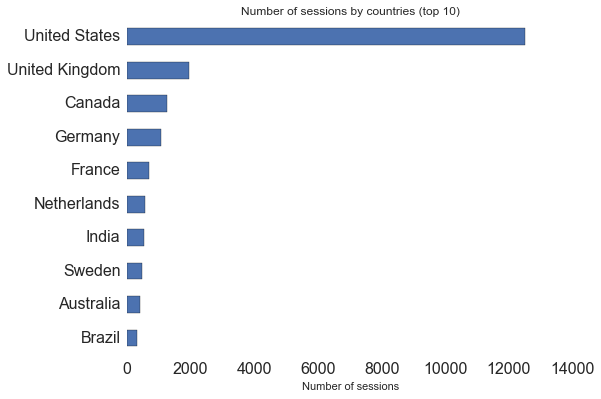

In [294]:
locations = pd.read_csv('locations.csv')
locations['Sessions'] = intify_sessions(locations)

plt.figure(figsize=(8,6))
ax = locations['Sessions'].plot(kind='barh')
ax.set_yticklabels(locations['Country'])
ax.invert_yaxis()
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Number of sessions by countries (top 10)")
_ = ax.set_xlabel("Number of sessions")

As expected, most of the users are from english speaking countries, the articles being written in english after all. We could translate them in French/German if we wanted but that wouldn't be worth the effort of maintaining multiple versions of each article.  

In terms of cities, the top 3 is *San Francisco*, *New York* and *London*. Again nothing surprising.  The first non english-speaking city is *Berlin* at the 8th position but *Paris* only needs 4 sessions away to overtake *Los Angeles* and take the 10th position.

To me, having people in thousands of cities in over 100 countries reading what we write is pretty mind-blowing and is by far the best part.    

I couldn't finish that notebook without satisfying some of my curiosity: what devices/OS/browsers are used.

First, what devices are readers mostly using?

- **desktop**: 16,211 (64.94%)
- **mobile**: 7,335 (29.38%)
- **tablet**: 1,418 (5.68%)

Nothing surprising here either, most people browse websites from a computer. In the mobile/tablet category, iPhone and iPad are the big winners in terms of number of users but Android still wins due to the sheer number of devices as we will see below.

If anyone is working on a B2B app, would you be able to share those numbers? It seems to me that you could forego responsiveness for quite a lot of B2B products, or only have a basic one.

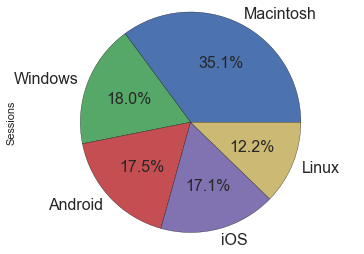

In [288]:
oses = pd.read_csv('os.csv')
oses['Sessions'] = intify_sessions(oses)
plt.figure()
# Limiting to OSes over 200 users, sorry WP, Chrome OS, 
# Firefox OS and Free/OpenBSD users
oses[oses['Sessions'] > 200]['Sessions'].plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=oses['Operating System'],
    fontsize=16,
    labeldistance=1.1
)
_ = plt.axis('equal')

Interestingly enough, Android and iOS are almost identical. 

I have to say I'm a bit surprised by the predominance of Macs, I was expecting it to be at 25% tops and have more Linux users than that.  
For Windows and Mac, it seems the readers are using majoritarily the last 2 versions of each OS, with 7 being the most used version for Window and 10.10 for Mac.  
A special hello for the person that came from Windows Server 2003 and the few still on Vista.  

Let's see what browsers everyone is using now.

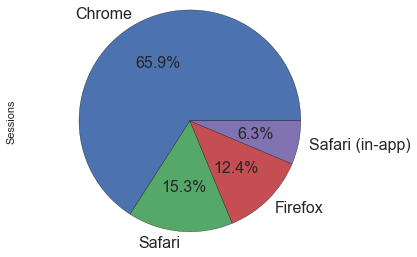

In [289]:
browsers = pd.read_csv('browsers.csv')
browsers['Sessions'] = intify_sessions(browsers)
# Limiting to browsers over 200 users, 
# sorry IE/Opera/Blackberry users
browsers[browsers['Sessions'] > 200]['Sessions'].plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=browsers['Browser'],
    fontsize=16
)
_ = plt.axis('equal')

This is a pretty damn big win for Chrome here and almost all of those are on Chrome 42 or 43.
Most Safari and Firefox users are also on the latest version of their respective browsers.  

About 200 sessions came from IE and they were mostly using IE10 or IE11 so if you are a frontend person and you are targeting the HN crowd, you don't have to worry about old browsers really (but I think you already knew that).  

Looking at the list below those major players is interesting though, you find out about things like [Amazon Silk](http://en.wikipedia.org/wiki/Amazon_Silk) or [YaBrowser](http://help.yandex.ru/yabrowser/?lang=en).